try to build a linear regression model

In [29]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [30]:
args = Namespace(
    seed = 1234,
    data_file = "sample_data.csv",
    num_samples=100,
    train_size=0.75,
    test_size=0.25,
    num_epochs=100,
)

In [31]:
def generate_data(num_samples):
    X = np.array(range(num_samples))
    y = 3.65*X + 10
    return X,y

In [32]:
print(X.shape)


(100,)


In [33]:
X,y = generate_data(args.num_samples)
data = np.vstack([X,y]).T
df = pd.DataFrame(data,columns=['X','y'])
df.head

<bound method NDFrame.head of        X       y
0    0.0   10.00
1    1.0   13.65
2    2.0   17.30
3    3.0   20.95
4    4.0   24.60
..   ...     ...
95  95.0  356.75
96  96.0  360.40
97  97.0  364.05
98  98.0  367.70
99  99.0  371.35

[100 rows x 2 columns]>

<function matplotlib.pyplot.show(close=None, block=None)>

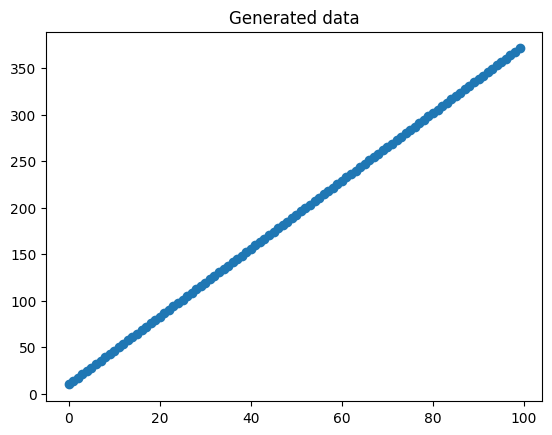

In [34]:
#画散点图
plt.title('Generated data')
plt.scatter(x=df["X"],y=df["y"])
plt.show

In [35]:

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['X'].values.reshape(-1,1), df['y'], test_size=args.test_size,
    random_state=args.seed
)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(75, 1) (75,) (25, 1) (25,)


In [46]:
#标准化数据standardize
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))

stan_X_train = X_scaler.transform(X_train)
stan_y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
stan_X_test = X_scaler.transform(X_test)
stan_y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()

In [53]:
#初始化 模型
lm = SGDRegressor(loss="squared_error",penalty=None,max_iter=args.num_epochs)

In [54]:
#训练
lm.fit(X=stan_X_train,y=stan_y_train)

,loss,'squared_error'
,penalty,None
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [ ]:
#预测 这一步是还原一下之前标准化的数值
pre_train = (lm.predict(stan_X_train)*np.sqrt(y_scaler.var_))+y_scaler.mean_
pre_test = (lm.predict(stan_X_test)*np.sqrt(y_scaler.var_))+ y_scaler.mean_

现在来评估模型的性能

In [56]:
import matplotlib.pyplot as plt

In [62]:
train_mse = np.mean((y_train - pre_train)** 2)
test_mse = np.mean((y_test-pre_test)**2)
print(train_mse,test_mse)

23.24112833857984 24.88471813932042
